In [52]:
# Gerekli kütüphaneleri içe aktar
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Veri setini oku / Load the dataset
df = pd.read_csv("5g_network_data.csv")


In [5]:
print(df.head())

                    Timestamp       Location  Signal Strength (dBm)  \
0  2025-05-28 06:59:51.089339  San Francisco                 -108.6   
1  2025-05-28 06:49:51.089353  San Francisco                  -71.5   
2  2025-05-28 06:39:51.089356        Chennai                  -67.5   
3  2025-05-28 06:29:51.089360       New York                  -73.3   
4  2025-05-28 06:19:51.089363        Kolkata                  -93.2   

   Download Speed (Mbps)  Upload Speed (Mbps)  Latency (ms)  Jitter (ms)  \
0                 714.94                60.41          10.0         4.09   
1                 686.69               148.70          12.3         1.50   
2                 796.34               136.33          19.9         1.22   
3                 208.56                68.59          12.2         4.94   
4                 409.85               137.23           6.3         2.94   

  Network Type Device Model   Carrier  ... Battery Level (%)  \
0       5G NSA    iPhone 14      AT&T  ...          

In [13]:
df.isnull().sum()

Timestamp                   0
Location                    0
Signal Strength (dBm)       0
Download Speed (Mbps)       0
Upload Speed (Mbps)         0
Latency (ms)                0
Jitter (ms)                 0
Network Type                0
Device Model                0
Carrier                     0
Band                        0
Battery Level (%)           0
Temperature (°C)            0
Connected Duration (min)    0
Handover Count              0
Data Usage (MB)             0
Video Streaming Quality     0
VoNR Enabled                0
Network Congestion Level    0
Ping to Google (ms)         0
Dropped Connection          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 50000 non-null  object 
 1   Location                  50000 non-null  object 
 2   Signal Strength (dBm)     50000 non-null  float64
 3   Download Speed (Mbps)     50000 non-null  float64
 4   Upload Speed (Mbps)       50000 non-null  float64
 5   Latency (ms)              50000 non-null  float64
 6   Jitter (ms)               50000 non-null  float64
 7   Network Type              50000 non-null  object 
 8   Device Model              50000 non-null  object 
 9   Carrier                   50000 non-null  object 
 10  Band                      50000 non-null  object 
 11  Battery Level (%)         50000 non-null  int64  
 12  Temperature (°C)          50000 non-null  float64
 13  Connected Duration (min)  50000 non-null  int64  
 14  Handov

In [54]:
# Temel Tanımlayıcı İstatistikler / Descriptive Statistics
numeric_cols = [
    "Download Speed (Mbps)", "Upload Speed (Mbps)", "Signal Strength (dBm)",
    "Latency (ms)", "Jitter (ms)", "Ping to Google (ms)", "Video Streaming Quality"
]

In [56]:
stats = df[numeric_cols].agg(['mean', 'median', 'var', 'min', 'max']).T.round(2)
stats.columns = ["Ortalama / Mean", "Medyan / Median", "Varyans / Variance", "Minimum", "Maksimum"]
print("\n TEMEL İSTATİSTİKLER / BASIC STATS\n", stats)


 TEMEL İSTATİSTİKLER / BASIC STATS
                          Ortalama / Mean  Medyan / Median  Varyans / Variance  \
Download Speed (Mbps)             551.18           552.13            67826.10   
Upload Speed (Mbps)                84.80            84.71             1413.07   
Signal Strength (dBm)             -84.84           -84.80              209.60   
Latency (ms)                       10.50            10.50               30.31   
Jitter (ms)                         2.56             2.57                2.01   
Ping to Google (ms)                54.95            55.00              675.14   
Video Streaming Quality             3.00             3.00                2.00   

                         Minimum  Maksimum  
Download Speed (Mbps)     100.04    999.99  
Upload Speed (Mbps)        20.00    150.00  
Signal Strength (dBm)    -110.00    -60.00  
Latency (ms)                1.00     20.00  
Jitter (ms)                 0.10      5.00  
Ping to Google (ms)        10.00    100.00  

In [58]:
# Lokasyon Bazlı Analiz (Varsayılan 'Location' varsa) / Location-based Analysis
if 'Location' in df.columns:
    loc_stats = df.groupby('Location')[["Download Speed (Mbps)", "Signal Strength (dBm)"]].mean().round(2)
    print("\n Lokasyon Bazlı İstatistikler / Location-based stats\n", loc_stats.sort_values("Download Speed (Mbps)", ascending=False).head(5))



 Lokasyon Bazlı İstatistikler / Location-based stats
                Download Speed (Mbps)  Signal Strength (dBm)
Location                                                   
Kolkata                       557.03                 -85.10
San Francisco                 553.01                 -84.81
Berlin                        551.76                 -84.69
Tokyo                         550.96                 -84.66
Mumbai                        550.04                 -84.75


In [60]:
# Cihaz & Operatör Karşılaştırması / Device & Carrier Comparison
if "Device Model" in df.columns:
    device_stats = df.groupby("Device Model")[["Download Speed (Mbps)", "Signal Strength (dBm)"]].mean().sort_values("Download Speed (Mbps)", ascending=False).head(5)
    print("\n En iyi 5 cihaz modeli / Top 5 Device Models:\n", device_stats)



 En iyi 5 cihaz modeli / Top 5 Device Models:
               Download Speed (Mbps)  Signal Strength (dBm)
Device Model                                              
Galaxy S23               554.940201             -84.957416
Nord 4                   553.011145             -84.732979
iPhone 14                551.087919             -84.867723
GT 7                     549.245048             -85.009322
Pixel 7                  547.635795             -84.619242


In [66]:
#  Kategorik Gruplar / Categorical Group Analysis
if "Network Type" in df.columns:
    network_group = df.groupby("Network Type")[["Download Speed (Mbps)", "Latency (ms)"]].mean().round(2)
    print("\n Ağ Tipine Göre Ortalama / Avg by Network Type:\n", network_group)



 Ağ Tipine Göre Ortalama / Avg by Network Type:
               Download Speed (Mbps)  Latency (ms)
Network Type                                     
4G                           551.36         10.49
5G NSA                       552.88         10.47
5G SA                        549.29         10.53


In [68]:
if "Network Congestion Level" in df.columns:
    congestion_group = df.groupby("Network Congestion Level")[["Download Speed (Mbps)", "Latency (ms)"]].mean().round(2)
    print("\n Yoğunluk Seviyesine Göre / Avg by Congestion Level:\n", congestion_group)



 Yoğunluk Seviyesine Göre / Avg by Congestion Level:
                           Download Speed (Mbps)  Latency (ms)
Network Congestion Level                                     
High                                     554.45         10.46
Low                                      550.87         10.51
Medium                                   548.28         10.52


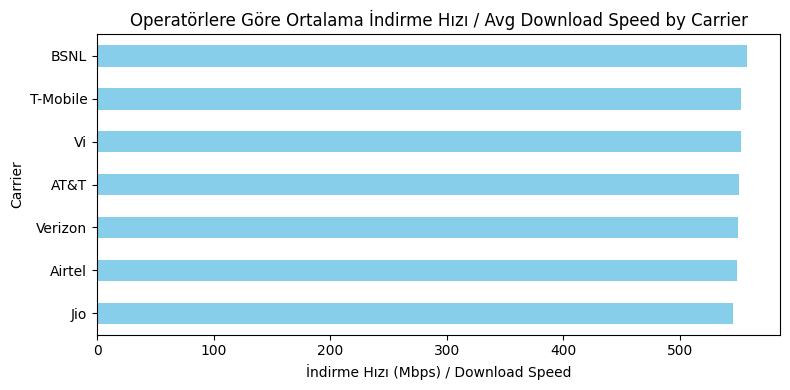

In [102]:
# Operatör Bazında Ortalama Hız / Avg Speed by Carrier
if "Carrier" in df.columns:
    carrier_avg = df.groupby("Carrier")["Download Speed (Mbps)"].mean().sort_values()
    plt.figure(figsize=(8, 4))
    carrier_avg.plot(kind='barh', color='skyblue')
    plt.title("Operatörlere Göre Ortalama İndirme Hızı / Avg Download Speed by Carrier")
    plt.xlabel("İndirme Hızı (Mbps) / Download Speed")
    plt.tight_layout()
    plt.show()

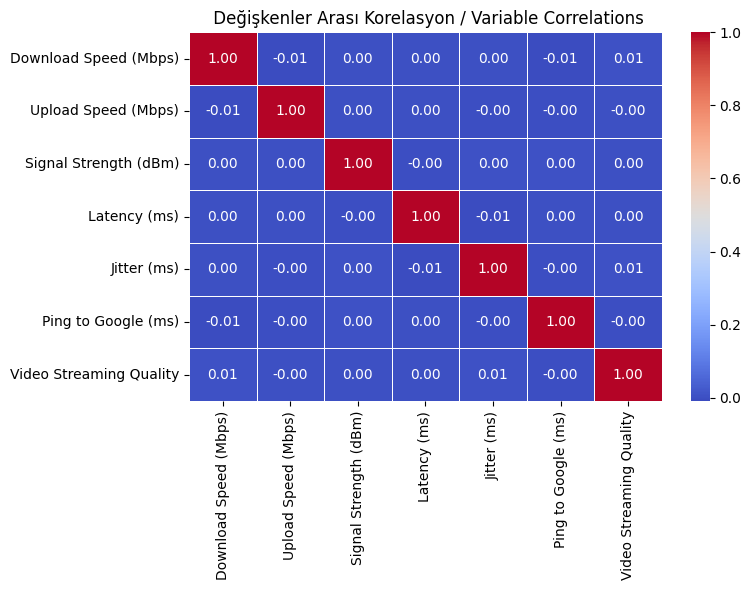

In [72]:
# Isı Haritası: Korelasyon Matrisi / Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(" Değişkenler Arası Korelasyon / Variable Correlations")
plt.tight_layout()
plt.show()

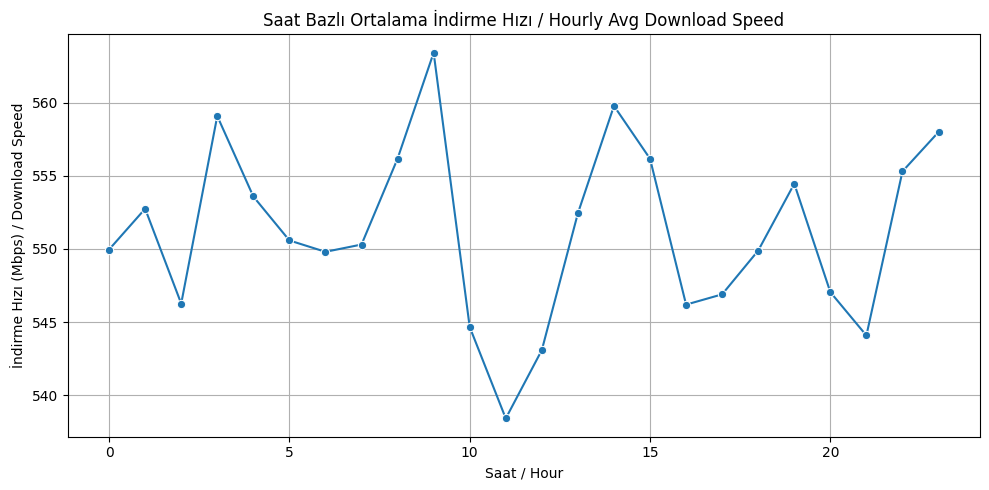

In [76]:
# Saat Bazlı Ortalama Hız / Hourly Average Download Speed
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Hour"] = df["Timestamp"].dt.hour
    hourly_avg = df.groupby("Hour")["Download Speed (Mbps)"].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o")
    plt.title("Saat Bazlı Ortalama İndirme Hızı / Hourly Avg Download Speed")
    plt.xlabel("Saat / Hour")
    plt.ylabel("İndirme Hızı (Mbps) / Download Speed")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

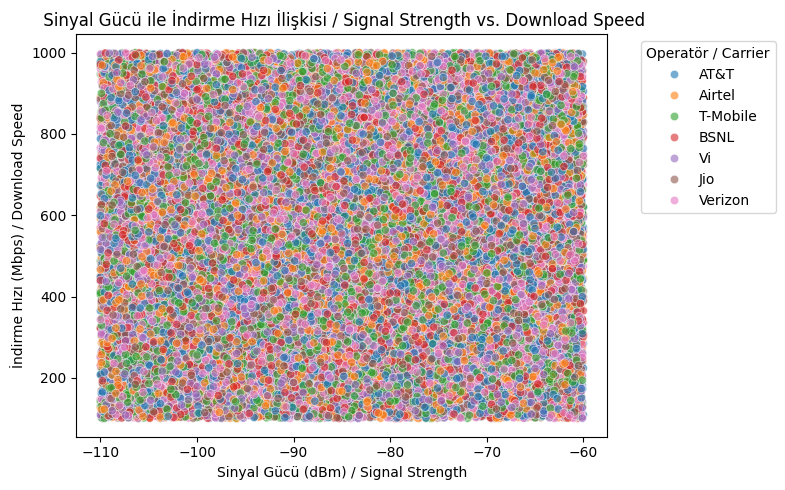

In [86]:
# Dağılım Grafiği: Sinyal Gücü & İndirme Hızı / Signal Strength vs. Download Speed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Signal Strength (dBm)", y="Download Speed (Mbps)", hue="Carrier", alpha=0.6)
plt.title(" Sinyal Gücü ile İndirme Hızı İlişkisi / Signal Strength vs. Download Speed")
plt.xlabel("Sinyal Gücü (dBm) / Signal Strength")
plt.ylabel("İndirme Hızı (Mbps) / Download Speed")
plt.legend(title="Operatör / Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

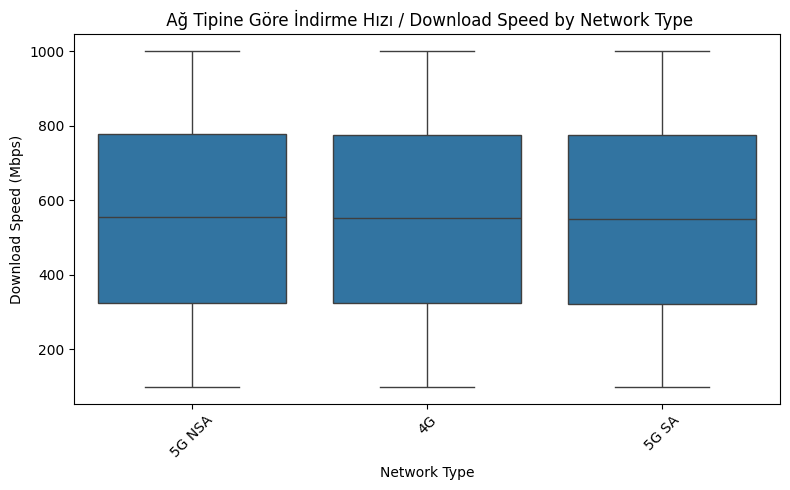

In [88]:
# Kutu Grafiği: Ağ Tipine Göre İndirme Hızı / Download Speed by Network Type
if "Network Type" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Network Type", y="Download Speed (Mbps)")
    plt.title(" Ağ Tipine Göre İndirme Hızı / Download Speed by Network Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [98]:
# Performans Tahmini (Makine Öğrenimi) / Performance Prediction (ML)
required_cols = {"Dropped Connection", "Signal Strength (dBm)", "Download Speed (Mbps)", "Latency (ms)"}
if required_cols.issubset(df.columns):
    ml_df = df.dropna(subset=required_cols)
    X = ml_df[["Signal Strength (dBm)", "Download Speed (Mbps)", "Latency (ms)"]]
    y = ml_df["Dropped Connection"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\n Bağlantı Düşmesi Tahmini Raporu / Dropped Connection Prediction Report:\n", classification_report(y_test, y_pred))



 Bağlantı Düşmesi Tahmini Raporu / Dropped Connection Prediction Report:
               precision    recall  f1-score   support

       False       0.50      0.50      0.50      5032
        True       0.49      0.49      0.49      4968

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [99]:
# Bağlantı Problemleri Analizi / Connection Problem Analysis
if "Dropped Connection" in df.columns:
    print("\n Bağlantı Düşme Oranı Ortalama:", round(df['Dropped Connection'].mean() * 100, 2), "%")
    if "Handover Count" in df.columns:
        corr_hand = df[["Handover Count", "Dropped Connection"]].corr().iloc[0,1]
        print(" Handover ile Bağlantı Düşmesi Korelasyonu / Correlation:", round(corr_hand, 2))

    if "Ping to Google (ms)" in df.columns:
        high_ping = df[df["Ping to Google (ms)"] > 80]
        print("\n Yüksek Ping (>80ms) Sayısı / High Ping Count:", len(high_ping))




 Bağlantı Düşme Oranı Ortalama: 50.06 %
 Handover ile Bağlantı Düşmesi Korelasyonu / Correlation: -0.01

 Yüksek Ping (>80ms) Sayısı / High Ping Count: 11037
